# Freeletics visualization experiments

Specify your user and password in `freeletics.conf` in the current directory:

```
user=<your-email>
password=<your-password>
```


In [1]:
import freeletics.api as api
from configargparse import DefaultConfigFileParser

config = None
with open('freeletics.conf') as file:
    config = DefaultConfigFileParser().parse(file)

token = api.do_login(config['user'], config['password'])
entries = api.get_feedentries(token)


In [2]:
import dateutil
objs = [ entry['object'] for entry in entries]

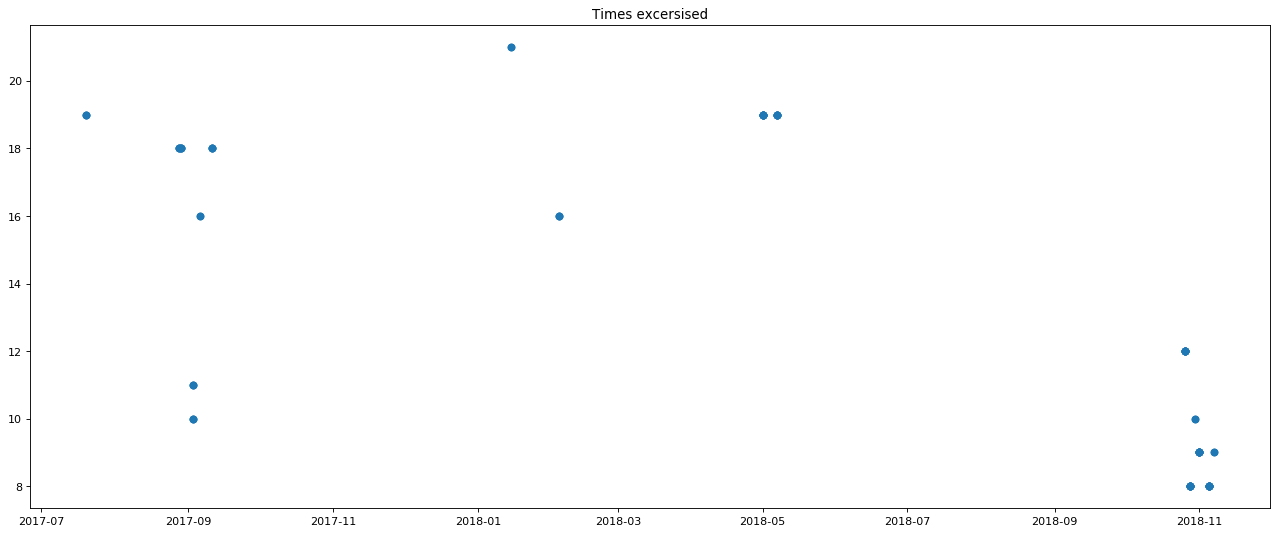

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import datetime

datetimes_excersized = [dateutil.parser.parse(obj['performed_at']) for obj in objs]
dates_excersized = [dt.date() for dt in datetimes_excersized]
times_excersized = [dt.hour for dt in datetimes_excersized]

fig, ax = plt.subplots(figsize=(20,8), dpi=80)
plt.plot_date(dates_excersized, times_excersized)
plt.title('Times excersised')
plt.show()